In [1]:
import cv2
import base64
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow

import time

In [2]:
imageL = cv2.imread('../Img/maskL.bmp')
imageR = cv2.imread('../Img/maskR.bmp')

grayL = cv2.cvtColor(imageL, cv2.COLOR_BGR2GRAY)
grayR = cv2.cvtColor(imageR, cv2.COLOR_BGR2GRAY)
disp = cv2.cvtColor(imageL, cv2.COLOR_BGR2GRAY)
#230454
#print (gray.shape)

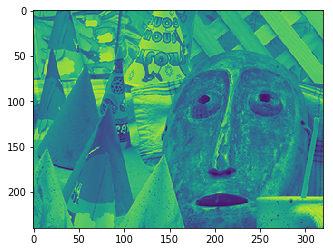

In [3]:
imshow(grayL)

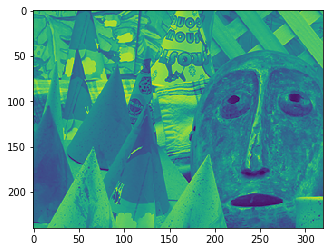

In [4]:
imshow(grayR)

In [5]:
# for x in gray:
#     print (x)

grayL=grayL.reshape(76800)
grayR=grayR.reshape(76800)
print (grayL.shape)
print (grayR.shape)


(76800,)
(76800,)


16.474451303482056


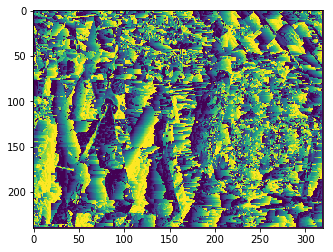

In [9]:
start =time.time()
# Load in both images, assumed to be RGBA 8bit per channel images
kernel=3
max_offset =20
w, h = 320,240  # assume that both images are same size   

# Depth (or disparity) map
depth = np.zeros((w*h), np.uint8)
depth.shape = h*w

kernel_half = int(kernel / 2)    
offset_adjust = 255 / max_offset  # this is used to map depth map output to 0-255 range

for y in range(kernel_half, h - kernel_half):      
    for x in range(kernel_half, w - kernel_half):
        best_offset = 0
        prev_ssd = 65534

        for offset in range(0,max_offset):               
            ssd = 0
            ssd_temp = 0                            

            # v and u are the x,y of our local window search, used to ensure a good 
            for v in range(-kernel_half, kernel_half):
                for u in range(-kernel_half, kernel_half): 
                    ssd_temp = int(grayL[(y+v)*w+x+u]) - int(grayR[(y+v)*w+(x+u) - offset])
                    ssd += ssd_temp * ssd_temp              
            # if this value is smaller than the previous ssd at this block
            # then it's theoretically a closer match. Store this value against
            ssd=ssd/(kernel*kernel)
            if ssd < prev_ssd:
                prev_ssd = ssd
                best_offset = offset

        # set depth output for this x,y location to the best match
        depth[y*w+x] = best_offset * offset_adjust
print (time.time()-start)
depth=depth.reshape(240,320)
imshow(depth)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axes_grid1

fig = plt.figure()
grid = axes_grid1.AxesGrid(
    fig, 111, nrows_ncols=(1, 2), axes_pad = 0.5, cbar_location = "right",
    cbar_mode="each", cbar_size="15%", cbar_pad="5%",)

img=grid[0].imshow(depth,cmap='gray')
grid.cbar_axes[0].colorbar(img)

img_C=grid[1].imshow(depth,cmap='jet')
grid.cbar_axes[1].colorbar(img_C)

plt.savefig('Disparity__colorMap_Toy_5_python.jpg', bbox_inches='tight', pad_inches=0.0, dpi=200,)

In [35]:
cv2.imwrite( "Disparity_toy_5.jpg", depth )

True

In [18]:
grayL=grayL.astype(int)
grayR=grayR.astype(int)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 51  0  0]
 ...
 [ 0  0  0 ... 51 76  0]
 [ 0  0  0 ... 25  0  0]
 [ 0  0  0 ...  0  0  0]]


In [ ]:
file = open('Tsukuba_L', 'w')
for i in grayL:
    file.write(str(hex(i))[2:])
    file.write('\n')
file.close()

In [ ]:
file = open('Tsukuba_R', 'w')
for i in grayR:
    file.write(str(hex(i))[2:])
    file.write('\n')
file.close()